The autograder will run with the following imports (and only the following imports). Depending on your notebook setup you may not actually need these imports, but its worth running this once at the start to be sure.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-bsfgfem2 because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [23]:
#grade

#INPUT:
# An integer rows storing the number of rows
# An integer cols storing the number of columns
#OUTPUT:
# A list of lists forming a 2D matrix.
# The output must be either a numpy.ndarray or a built-in python nested list

def emptyMatrix(rows, cols):
    finallist = []
    for i in range(rows):
        finallist.insert(0,[])
        
    for a in finallist:
        
        for i in range(cols):
            a.insert(0,0.0)

    return(finallist)
emptyMatrix(5, 6)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [26]:
#grade

#INPUT:
#A lists of lists forming a 2D matrix (using a built-in list)
#OUTPUT:
# A list of size 2 storing the number of rows at index 0 
# and the number of columns at index 1
def getSize(matrix):
    matrix = np.array(matrix)
    print(matrix)
    rowsandcolumns = []
    rc = list(matrix.shape)
    rowsandcolumns.append(rc)
    
    return rowsandcolumns[0]
getSize(emptyMatrix(6, 6))

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


[6, 6]

In [8]:
#grade

#INPUT:
# A lists of lists forming a 2D matrix (using a built-in list)
# A string fName storing the absolute path to a space-separated text file
#OUTPUT:
# A list of lists forming a 2D matrix.
# The output must be either a numpy.ndarray or a built-in python nested list
# The matrix should be the same dimensions as the input and must include all x,y pairs 
# found in the input file.
# NOTE: If an input pair has a coordinate larger than the matrix, it should be ignored
def stringParseLineBreaks(file, bchar):
    listedofstrings = []
    with open(file) as myFile: 
        for line in myFile:
            listedofstrings.append(line.strip().split(bchar))
    #listedofstrings = [int(i) for i in listedofstrings]
    return listedofstrings
def importValues(matrix, fName):
    correct = stringParseLineBreaks(fName, " ")
    print(correct)
    filelist = []
    for index in correct:
            filelist.append(list(map(int, index)))
    #filelist.append("end")
    print(filelist)
    for q in range(len(filelist)):
        i= int(filelist[q][0])
        j = int(filelist[q][1])
        if (i >= 0 and j >=0) and (i< len(matrix) and j<len(matrix[0])):
            matrix[i][j] = 1
            #print(matrix[i][j])
            #print(matrix)
    print(matrix)
    diffarray = np.array(matrix)
    print(diffarray)
    return matrix

In [9]:
#grade

#INPUT:
# A lists of lists forming a 2D matrix (using a built-in list)
#OUTPUT:
# A list of lists forming a 2D matrix.
# The output must be either a numpy.ndarray or a built-in python nested list
# The matrix should be the same dimensions as the input and be the next timestamp
# of cellular automata. Your logic should consider indices past matrix boundaries 'empty'.
# NOTE: You should return a deep copy of the matrix, not a shallow one!
from copy import copy, deepcopy
def update(matrix):
    matrix = np.array(matrix)
    newstate = np.zeros((matrix.shape[0], matrix.shape[1]))
    
    for row in range(matrix.shape[0]):
        for column in range(matrix.shape[1]):
            alive = np.sum(matrix[max(0, row-1):min(row+2, matrix.shape[0]), 
                                  max(0, column-1):min(column+2, matrix.shape[1])]) - matrix[row, column]
            
            if matrix[row, column] == 1 and (alive < 2 or alive > 3):
                newstate[row, column] = 0
            elif (matrix[row, column] == 1 and 2 <= alive <= 3) or (matrix[row, column] == 0 and alive == 3):
                newstate[row, column] = 1
                
    finalcopy = deepcopy(newstate)
    return finalcopy

In [10]:
myFile = 'data/vertLine_5_5.txt'
xdim = 5
ydim = 5

em = emptyMatrix(xdim,ydim) 
em = importValues(em, myFile)
update(em)

[['1', '0'], ['2', '0'], ['3', '0'], ['4', '0'], ['5', '0']]
[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0]]
[[0.0, 0.0, 0.0, 0.0, 0.0], [1, 0.0, 0.0, 0.0, 0.0], [1, 0.0, 0.0, 0.0, 0.0], [1, 0.0, 0.0, 0.0, 0.0], [1, 0.0, 0.0, 0.0, 0.0]]
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

**Animation Code** In order to complete the autograded portion of this mini-project, you do not need to edit or modify the following functions. However you may want to modify things like the color, the framerate, or color boundaries when you visualize your own dataset.

In [11]:
#INPUT:
# a frameNumber
# a matplotlib AxesImage object
# a 2D matrix (Notably this can be a 3D matrix as well with individual colors as RGBs)
#OUTPUT:
# a matplotlib AxesImage object containing the updated matrix
def updateFig(frameNum, img, matrix):
    # The first frame should be the actual input dataset, not the first update step.
    if (frameNum == 0):
        return img    

    # NOTE: If you are making a gif for part 2, you will probably want to replace this
    # The main point is that you need to both update matrix and img with the new frame
    nm = update(matrix)
    
    matrix[:] = nm[:]

    img.set_data(nm)

    return img

#INPUT:
# a 2D matrix (Notably this can be a 3D matrix as well with individual colors as RGBs)
# an integer storing the number of steps
# a string storing the path and filename of the file to be written
#OUTPUT:
# None
# Instead an image or gif is saved to the location specified by outname
def animate(matrix, steps, outname):
    matrix = np.array(matrix)
    
    # NOTE: If you change these two lines you can adjust the color and bin sizes
    # This is only relevant for part 2 -- this code is not used or graded by the autograder
    cmap = colors.ListedColormap(['blue', 'yellow', 'red']) 
    bounds = [0, 1, 2, 3]


    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    plt.grid(False)
    img = ax.imshow(matrix, cmap=cmap, norm=norm)
    ani = animation.FuncAnimation(fig, updateFig, fargs=(img, matrix), frames=steps)


    ani.save(outname, fps=2)

Run-Code

[['0', '1'], ['1', '1'], ['2', '1']]
[[0, 1], [1, 1], [2, 1]]
[[0.0, 1, 0.0], [0.0, 1, 0.0], [0.0, 1, 0.0]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


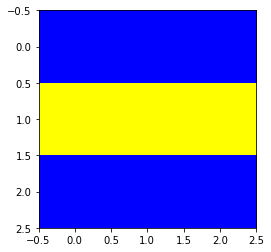

In [12]:
myFile = 'data/spinner_3_3.txt'
xdim = 3
ydim = 3

em = emptyMatrix(xdim,ydim) 
em = importValues(em, myFile)
animate(em,4,"outputgif1.gif")